Default RF Accuracy (n_estimators=10): 1.0000

Best Accuracy: 1.0000 achieved with n_estimators=7


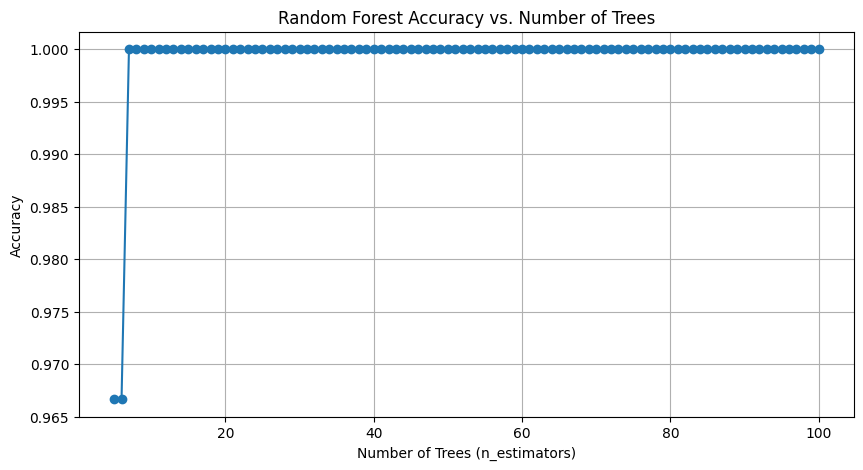

In [4]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("iris (4).csv")

# Features and target
X = df.drop(columns=["species"])
y = df["species"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Train with default n_estimators=10
rf_default = RandomForestClassifier(n_estimators=10, random_state=42)
rf_default.fit(X_train, y_train)
y_pred_default = rf_default.predict(X_test)
default_accuracy = accuracy_score(y_test, y_pred_default)

print(f"Default RF Accuracy (n_estimators=10): {default_accuracy:.4f}")

# 2. Fine-tune the number of trees
best_accuracy = 0
best_n = 0
accuracies = []

for n in range(5, 101):
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

    if acc > best_accuracy:
        best_accuracy = acc
        best_n = n

print(f"\nBest Accuracy: {best_accuracy:.4f} achieved with n_estimators={best_n}")

# Optional: plot accuracy vs. n_estimators
plt.figure(figsize=(10, 5))
plt.plot(range(5, 101), accuracies, marker='o')
plt.title('Random Forest Accuracy vs. Number of Trees')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()
